<a href="https://colab.research.google.com/github/remytr/Black-Scholes-Model/blob/main/Black_Scholes_Option_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Option Pricing Model using Black-Scholes Model

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
# Define the variables

S = 45 # Underlying price of the stock. $42
K = 40 # Strike price, at the time the option expires you have the option to purchase the underlying stock for $40.
T = 3 # Time to expiration. Expires 6 months in the future
r = 0.1 # Risk-free rate.
vol = 0.5 # Volatility (sigma). Essentially the standard deviation of the stock's prices

In [5]:
# Calculate d1

d1 = (math.log(S/K) + (r + (vol**2)/2)*T)/(vol*math.sqrt(T))

In [6]:
# Calculate d2

d2 = d1 - vol*math.sqrt(T)

In [7]:
# Calculate Call Option Price
# N(d1) is a probablity. Finds the probablity that the underlying stock price will be higher than strike price K at the time the call expires.
# N is a cumulative distribution function.

C = S*norm.cdf(d1) - K*math.exp(-r*T)*norm.cdf(d2)

In [8]:
# Calculate Put Option Price
# The reverse of the call option price. If I own the put option I am better off if the underlying stock price decreases.
# Inverse relationship between call and put option on the same stock.
# With the cdf functions we are assuming normal distributions. So mean of 0 and std of 1.

P = K*math.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

In [9]:
print("The value of d1 is ", round(d1,4 ))
print("The value of d2 is ", round(d2,4 ))
print("The value of the call option is: $", round(C,2 ))
print("The value of the put option is: $", round(P,2 ))

The value of d1 is  0.9154
The value of d2 is  0.0494
The value of the call option is: $ 21.5
The value of the put option is: $ 6.13


Volatility has a positive correlation for call and put option price.

Putting all of it into a function so I can call it easily

In [10]:
def black_scholes(S,K,T,r,vol):

  d1 = (math.log(S/K) + (r + (vol**2)/2)*T)/(vol*math.sqrt(T))
  d2 = d1 - vol*math.sqrt(T)

  C = S*norm.cdf(d1) - K*math.exp(-r*T)*norm.cdf(d2)
  P = K*math.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

  print("The value of the call option is: $", round(C,2 ))
  print("The value of the put option is: $", round(P,2))
  return C,P

In [11]:
black_scholes(100,40,3,0.1,0.5)

The value of the call option is: $ 71.97
The value of the put option is: $ 1.6


(np.float64(71.96930464289777), np.float64(1.6020334701664827))

# Sensitivty Analysis

In [12]:
# Goal is to examine how the theoretical option price changes when you vary each of the input parameters of the model.
# Vary one parameter and keep the others constant. Then plot the results.

S = [20,40,60,80,100]
K = [30,50,70,90,110]
T = [0.2,0.4,0.6,0.8,1.0]
r = [0.05,0.10,0.15,0.20,0.25]
vol = [0.1,0.2,0.3,0.4,0.5]

In [13]:
# Write loops that will loop over each index of each parameter and plot the call and put option prices.
# The x axis will have the parameter I am varying and on the y axis plot the call and put option prices.

results = {}
param_names = ['S','K','T','r','vol']
param_lists = [S,K,T,r,vol]

for param_name, param_list in zip(param_names,param_lists):
  call_prices = []
  put_prices = []

  default_params = {'S':50, 'K':40, 'T':1, 'r':0.05, 'vol':0.2}

  for i in param_list:
    current_params = default_params.copy()
    current_params[param_name] = i

    C,P = black_scholes(**current_params)
    call_prices.append(C)
    put_prices.append(P)

  results[param_name] = {'call': call_prices, 'put': put_prices, 'x_values': param_list}

The value of the call option is: $ 0.0
The value of the put option is: $ 18.05
The value of the call option is: $ 4.18
The value of the put option is: $ 2.23
The value of the call option is: $ 21.99
The value of the put option is: $ 0.04
The value of the call option is: $ 41.95
The value of the put option is: $ 0.0
The value of the call option is: $ 61.95
The value of the put option is: $ 0.0
The value of the call option is: $ 21.47
The value of the put option is: $ 0.01
The value of the call option is: $ 5.23
The value of the put option is: $ 2.79
The value of the call option is: $ 0.39
The value of the put option is: $ 16.98
The value of the call option is: $ 0.01
The value of the put option is: $ 35.62
The value of the call option is: $ 0.0
The value of the put option is: $ 54.64
The value of the call option is: $ 10.4
The value of the put option is: $ 0.01
The value of the call option is: $ 10.85
The value of the put option is: $ 0.06
The value of the call option is: $ 11.33
The va

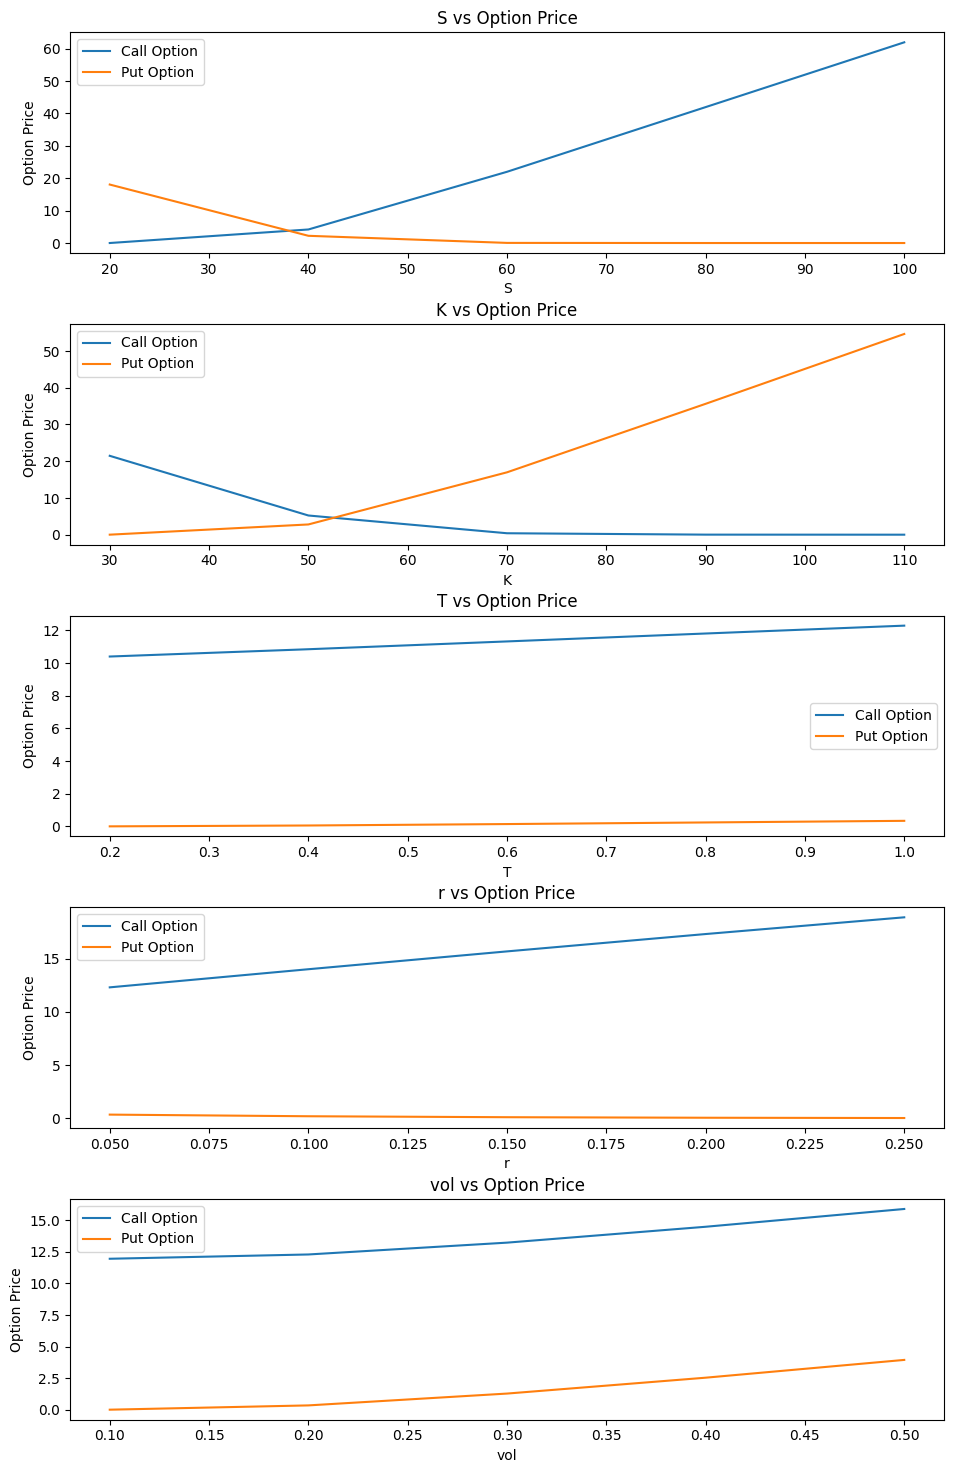

In [14]:
# Plot the results

fig, axes = plt.subplots(len(param_names), 1, figsize=(10,15))
fig.tight_layout(pad=3.0)

for i, param_name in enumerate(param_names):
  ax = axes[i]
  ax.plot(results[param_name]['x_values'], results[param_name]['call'], label='Call Option')
  ax.plot(results[param_name]['x_values'], results[param_name]['put'], label='Put Option')
  ax.set_xlabel(param_name)
  ax.set_ylabel('Option Price')
  ax.set_title(f'{param_name} vs Option Price')
  ax.legend()
plt.show()

# Finite Difference Method: Explicit Method to evaluate a European Call Option

In [15]:
# Define the parameters of the problem

r = 0.2
sigma = 0.25
Nt = 1600 # Number of time steps
Ns = 160 # Number of asset price steps
Smax = 20 # Max asset price considered
Smin = 0 # Min asset price considered
T = 1 # Expiration of contract
E = 10 # Exercise price of the underlying asset

In [19]:
dt = (T/Nt) # Time step
ds = (Smax-Smin)/Ns # price step

V = np.zeros((Ns+1,Nt+1)) # Initialize the value function

# Discretization of asset (S) and tau (tau = T-t) variables
S = Smin + np.arange(Ns+1)*ds
tau = np.arange(Nt+1)*dt

# Initial conditions prescribed by the European Call payoff at expiry: V(S,tau = 0) = max(S-E,0)
V[:,0] = np.maximum(S-E,0)

# Boundary conditions prescribed by the European Call
V[0,:] = 0
V[-1,:] = Smax - (E * np.exp(-r*tau)) # discount of the exercise price

# Implmenting the explict algorithm
for j in range(Nt):
  for i in range(1,Ns):
    V[i,j+1] = V[i,j] + r*(V[i,j]-V[i-1,j])
    V[i,j+1] = 0.5 * dt * (sigma * sigma * i * i - (r*i)) * V[i-1,j] + (1-dt*(sigma*sigma*i*i+r)) * V[i,j] + 0.5*dt*(sigma*sigma*i*i + (r*i)) * V[i+1,j]

In [21]:
plt.plot(S,V[:,0])

(161, 1601)